# 1. 加载必要的模块

In [2]:
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import pandas as pd  
import numpy as np
import seaborn as sns
from scipy.fftpack import fft,ifft

# 2. 确保csv数据格式如图所示

![csv文件格式](https://raw.githubusercontent.com/techyoung-edu/sleepmonitor/master/acc_csv_format.png)

# 3. 加载csv数据

In [3]:
dataset = pd.read_csv("39Hz_Accelerometer.csv",names = ["time","acc"])
dataset.head()

,time,acc
0,19:41:35.193,0.961693
1,19:41:35.226,0.963778
2,19:41:35.226,0.966693
3,19:41:35.263,0.963984
4,19:41:35.300,0.962294


# 4. 处理acc数据
+ 使用numpy array来对acc_list进行处理
+ 把加速度减去1.0,这是传感器静态时默认的加速度。
+ 把加速度乘1000,从而使的加速度变成以mg为单位。
+ 求出期望和标准差

In [4]:
acc_list = np.array(dataset["acc"])
acc_list = (acc_list - 1.0)*1000
acc_mean = np.mean(acc_list)
acc_std  = np.std(acc_list)
acc_mean_str = "{:.2f}".format(acc_mean)
acc_std_str = "{:.2f}".format(acc_std)
print("the acc dist mean:%.2fmg and std:%.2fmg" %(acc_mean,acc_std))

the acc dist mean:-35.95mg and std:2.13mg


# 5. 绘制综合加速度直方分布图
+ rcParams设置中文字体
```python
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 用来正常显示中文标签
```
+ 用axvline绘制±σ区间 参考:https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.axvline.html
+ 直方图的bin宽度是0.1mg(16bit ±2g 的加速度传感器的分辨率也就是0.06mg,我们把bin的宽度设为0.1mg,就可以保证最小的分bin单位)
+ 图片大小为16:9,单位了在jupyter notebook里显示完全,先用(8,4.5)和dpi=50来绘制
+ 不要设置xlim，这样可以观察出来加速度的分布范围

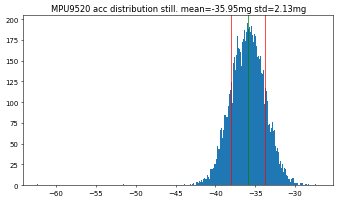

In [13]:
bins=np.arange(np.min(acc_list),np.max(acc_list),0.1)
plt.figure(figsize=(8, 4.5), dpi=50)
ax = plt.subplot()
plt.hist(acc_list,bins) 
plt.title("MPU9520 acc distribution still. mean="+acc_mean_str+"mg std="+acc_std_str+"mg") 
plt.axvline(x=acc_mean,color="green",linewidth=1)
plt.axvline(x=acc_mean-acc_std,color="r",linewidth=1)
plt.axvline(x=acc_mean+acc_std,color="r",linewidth=1)
plt.show()

# 6. 绘制综合加速度直方分布图-xlim设置为-128到127


In [ ]:
bins=np.arange(np.min(acc_list),np.max(acc_list),0.1)
plt.figure(figsize=(8, 4.5), dpi=50)
ax = plt.subplot()
plt.hist(acc_list,bins) 
plt.title("MPU9520 acc distribution still. mean="+acc_mean_str+"mg std="+acc_std_str+"mg") 
plt.axvline(x=acc_mean,color="green",linewidth=1)
plt.axvline(x=acc_mean-acc_std,color="r",linewidth=1)
plt.axvline(x=acc_mean+acc_std,color="r",linewidth=1)
plt.show()

# 7. 绘制综合加速度violin图
+ 低g加速度分析的范围是±128mg

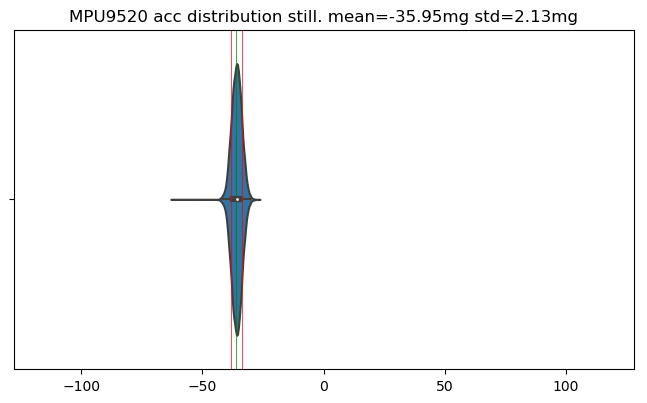

In [22]:
bins=np.arange(np.min(acc_list),np.max(acc_list),0.1)
plt.figure(figsize=(8, 4.5), dpi=100)
ax = plt.subplot()
ax.set_xlim(-128, 128)
sns.violinplot(x=acc_list)
plt.title("MPU9520 acc distribution still. mean="+acc_mean_str+"mg std="+acc_std_str+"mg") 
plt.axvline(x=acc_mean,color="green",linewidth=0.5)
plt.axvline(x=acc_mean-acc_std,color="r",linewidth=0.5)
plt.axvline(x=acc_mean+acc_std,color="r",linewidth=0.5)
plt.show()

# 8. 绘制综合加速度直方KDE分布图
+ 低g加速度分析的范围是±128mg

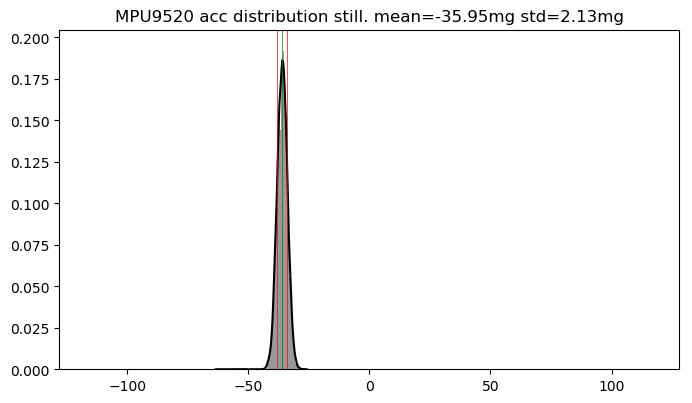

In [23]:
bins=np.arange(np.min(acc_list),np.max(acc_list),0.1)
plt.figure(figsize=(8, 4.5), dpi=100)
ax = plt.subplot()
ax.set_xlim(-128, 128)
sns.distplot(acc_list,kde=True,bins=bins,color="black")
plt.title("MPU9520 acc distribution still. mean="+acc_mean_str+"mg std="+acc_std_str+"mg") 
plt.axvline(x=acc_mean,color="green",linewidth=0.5)
plt.axvline(x=acc_mean-acc_std,color="r",linewidth=0.5)
plt.axvline(x=acc_mean+acc_std,color="r",linewidth=0.5)
plt.show()

# 8. 绘制综合加速度直方KDE分布图+小提琴图

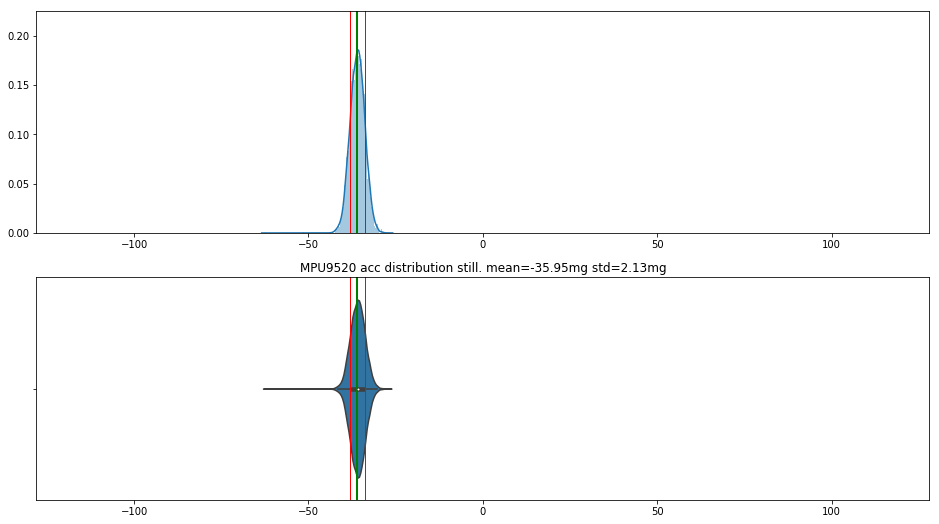

In [26]:
acc_min = -128
acc_max =  128
figure,axes = plt.subplots(2,1,figsize = (16,9),sharex = False)
axes[0].set_xlim(acc_min, acc_max)
axes[1].set_xlim(acc_min, acc_max)
plt.title("MPU9520 acc distribution still. mean="+acc_mean_str+"mg std="+acc_std_str+"mg") 
sns.distplot(acc_list,kde=True,bins=np.arange(acc_min,acc_max,0.1),ax=axes[0])
sns.violinplot(x=acc_list,ax=axes[1])
axes[0].axvline(x=acc_mean,color="green",linewidth=2)
axes[0].axvline(x=acc_mean-acc_std,color="r",linewidth=1)
axes[0].axvline(x=acc_mean+acc_std,color="r",linewidth=1)
axes[1].axvline(x=acc_mean,color="green",linewidth=2)
axes[1].axvline(x=acc_mean-acc_std,color="r",linewidth=1)
axes[1].axvline(x=acc_mean+acc_std,color="r",linewidth=1)